In [81]:
import pathlib
import pandas as pd
cub_dir = pathlib.Path(os.environ['CUB200_DIR'])

# Attention DF

In [ ]:
img_df = pd.read_csv(os.environ['STUDY_DIR'] + '/attention-samples/image_paths.csv').set_index('id')
img_df

In [ ]:
source_df = pd.read_csv('user_study/box_pairs.csv').set_index('id')
source_df

In [ ]:
img_df = img_df.merge(source_df, left_index=True, right_index=True, suffixes=('', '_source'))
img_df

## Apply Image Generation

In [71]:
%load_ext autoreload
%autoreload 1

%aimport process_images

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


row19_img_idx221_spunky-train_spunky-train_best_cozy-plume_cozy-plume_best_densenet161


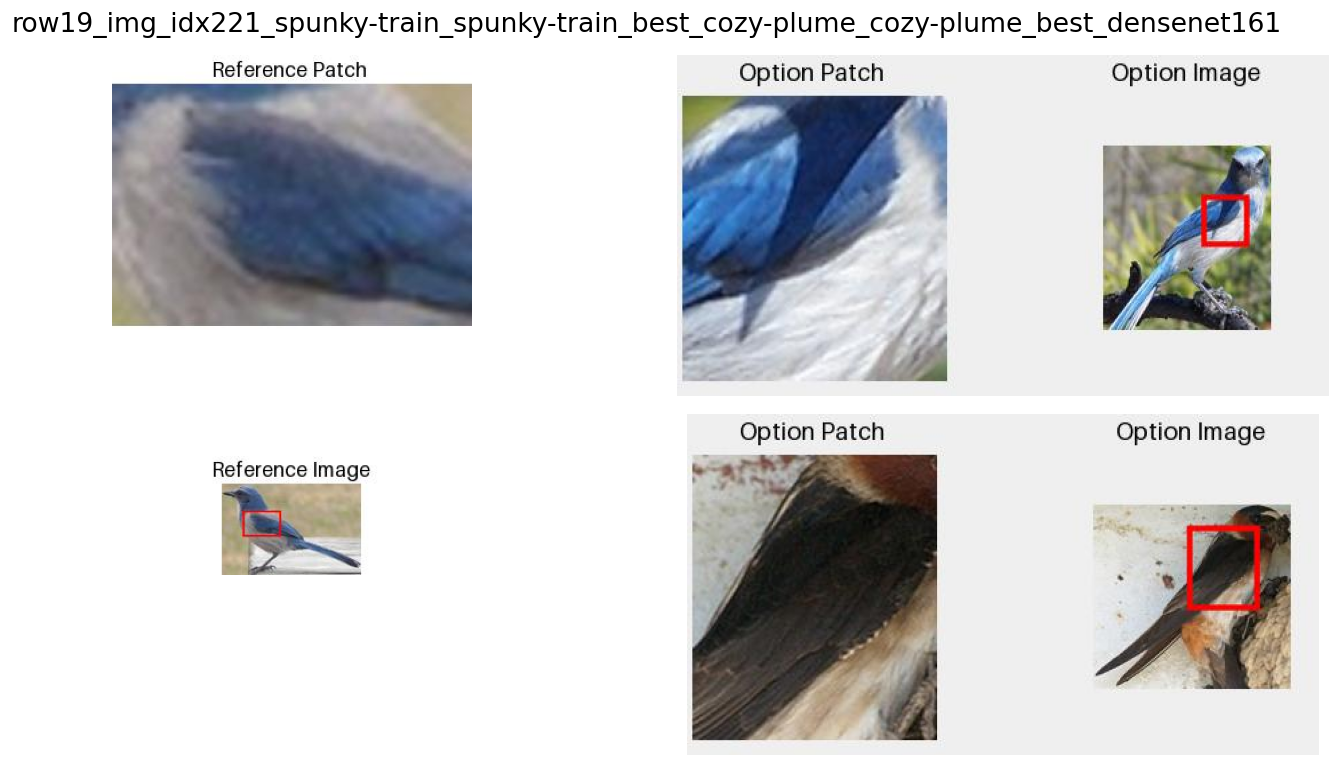

In [176]:
from IPython.display import display, HTML
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from PIL import Image, ImageDraw

def display_sample(sample):
    # Create figure
    fig = plt.figure(figsize=(12, 8), dpi=120)
    
    # Create GridSpec layout
    # 2 rows, 2 columns with the left column spanning both rows
    gs = gridspec.GridSpec(5, 2, height_ratios=[.2, .2, .2, .2, .2])
    
    # Create the reference plot spanning both rows on the left
    ax_ref = fig.add_subplot(gs[0:3, 0])  # Spans all rows, first column
    ax_ref.imshow(Image.open(sample.reference_image), origin='upper')
    ax_ref.axis('off')
    
    # Create option A plot in top right
    ax_opt_a = fig.add_subplot(gs[0:2, 1])  # First row, second column
    ax_opt_a.imshow(Image.open(sample.option_cos_image), origin='upper', )
    # ax_opt_a.set_title("Option A - Left")
    ax_opt_a.axis('off')
    
    # Create option B plot in bottom right
    ax_opt_b = fig.add_subplot(gs[2:4, 1])  # Second row, second column
    ax_opt_b.imshow(Image.open(sample.option_l2_image), origin='upper')
    # ax_opt_b.set_title("Option B - Left")
    ax_opt_b.axis('off')
    
    # Add main title
    print(sample.name)

    plt.suptitle(str(sample.name), size=16)
    
    # Adjust layout
    plt.tight_layout()
    plt.show()

def show(iloc):
    return display_sample(img_df.iloc[iloc])

attention_rows = {}
def fake_bb(iloc, d, bb):
    row = img_df.iloc[iloc]
    img_path = row[f'option_{d}_image_source'].values[0]
    print('img_path', img_path)
    img = Image.open(cub_dir/img_path)
    draw = ImageDraw.Draw(img)
    draw.rectangle(bb, outline='red', width=5)
    print(row.name, bb)
    attention_rows[row.name] = (d, bb)
    return img

show(4)

img_path train_cropped/137.Cliff_Swallow/Cliff_Swallow_0044_133927.jpg
row19_img_idx221_spunky-train_spunky-train_best_cozy-plume_cozy-plume_best_densenet161 (0, 0, 100, 100)


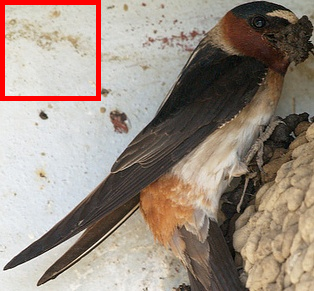

In [177]:
fake_bb(4, 'l2', (0, 0, 100, 100))

row37_img_idx46_feisty-house_feisty-house_best_warm-beach_warm-beach_best_resnet50[pretraining=inaturalist]


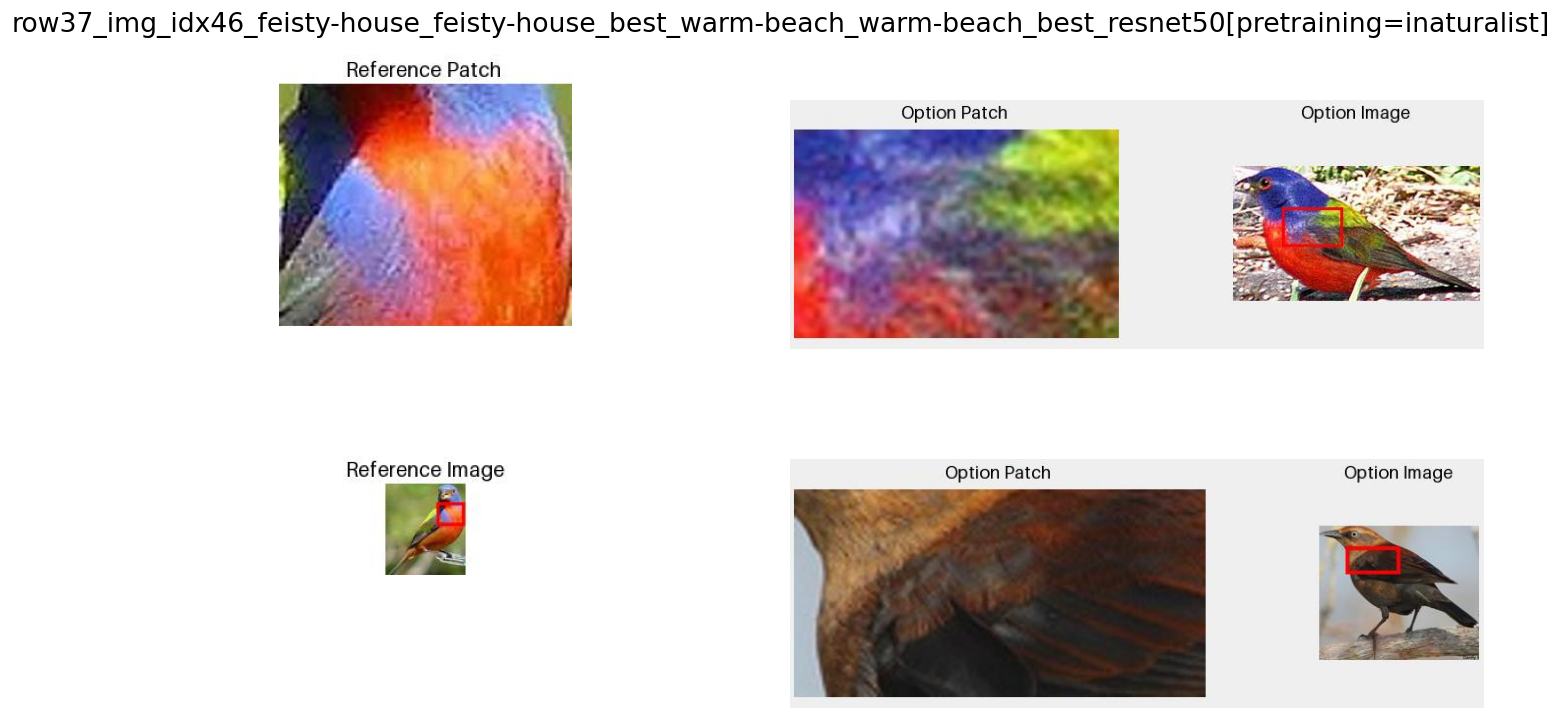

In [178]:
show(9)

img_path train_cropped/011.Rusty_Blackbird/Rusty_Blackbird_0036_6550.jpg
row37_img_idx46_feisty-house_feisty-house_best_warm-beach_warm-beach_best_resnet50[pretraining=inaturalist] (20, 200, 120, 300)


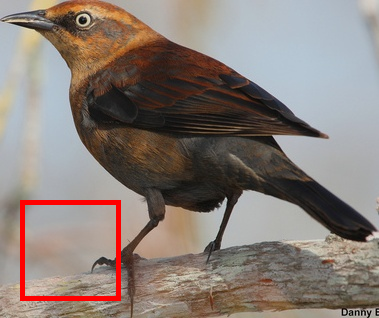

In [179]:
fake_bb(9, 'l2', (20, 200, 120, 300))

row8_img_idx154_quirky-spirit_quirky-spirit_best_true-season_true-season_best_densenet161


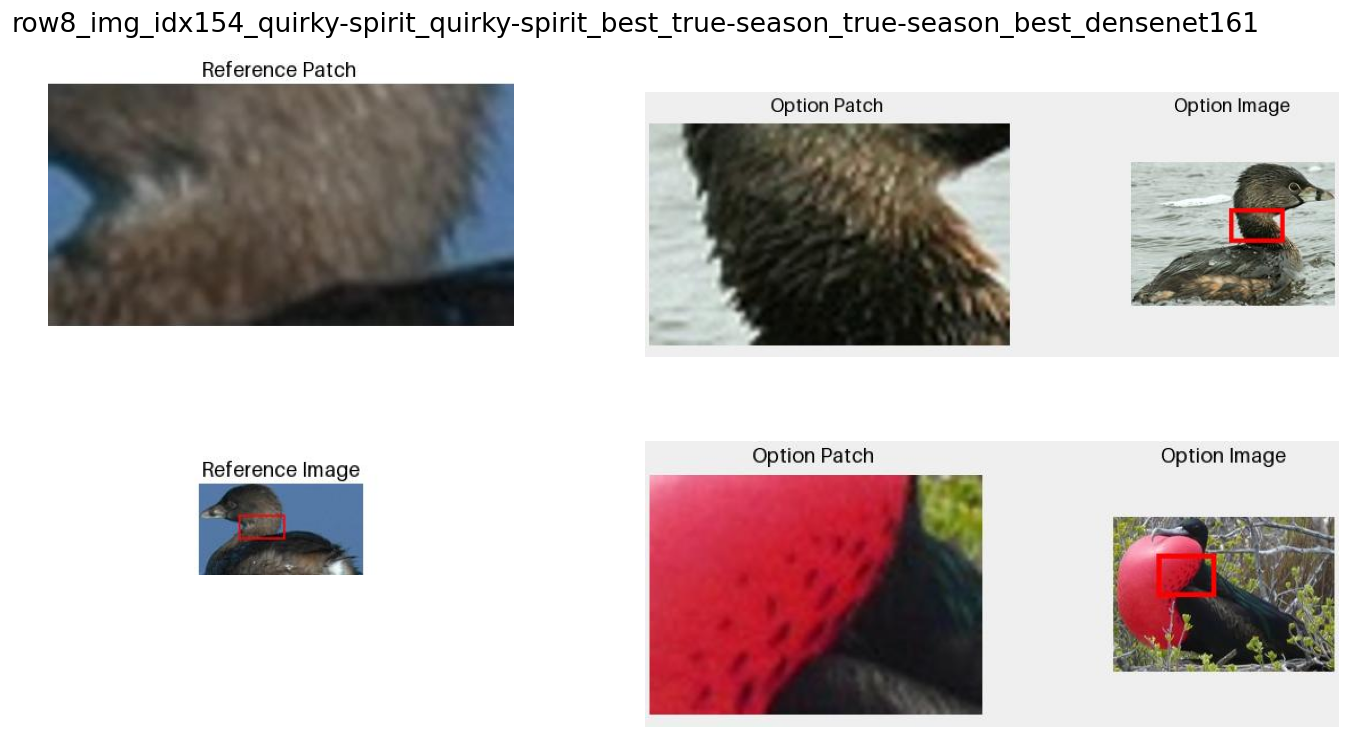

In [180]:
show(20)

img_path train_cropped/044.Frigatebird/Frigatebird_0021_42913.jpg
row8_img_idx154_quirky-spirit_quirky-spirit_best_true-season_true-season_best_densenet161 (150, 20, 250, 70)


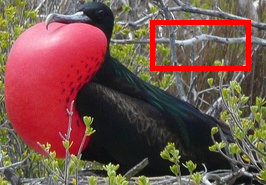

In [181]:
fake_bb(20, 'l2', (150, 20, 250, 70))

row19_img_idx162_spunky-train_spunky-train_best_cozy-plume_cozy-plume_best_densenet161


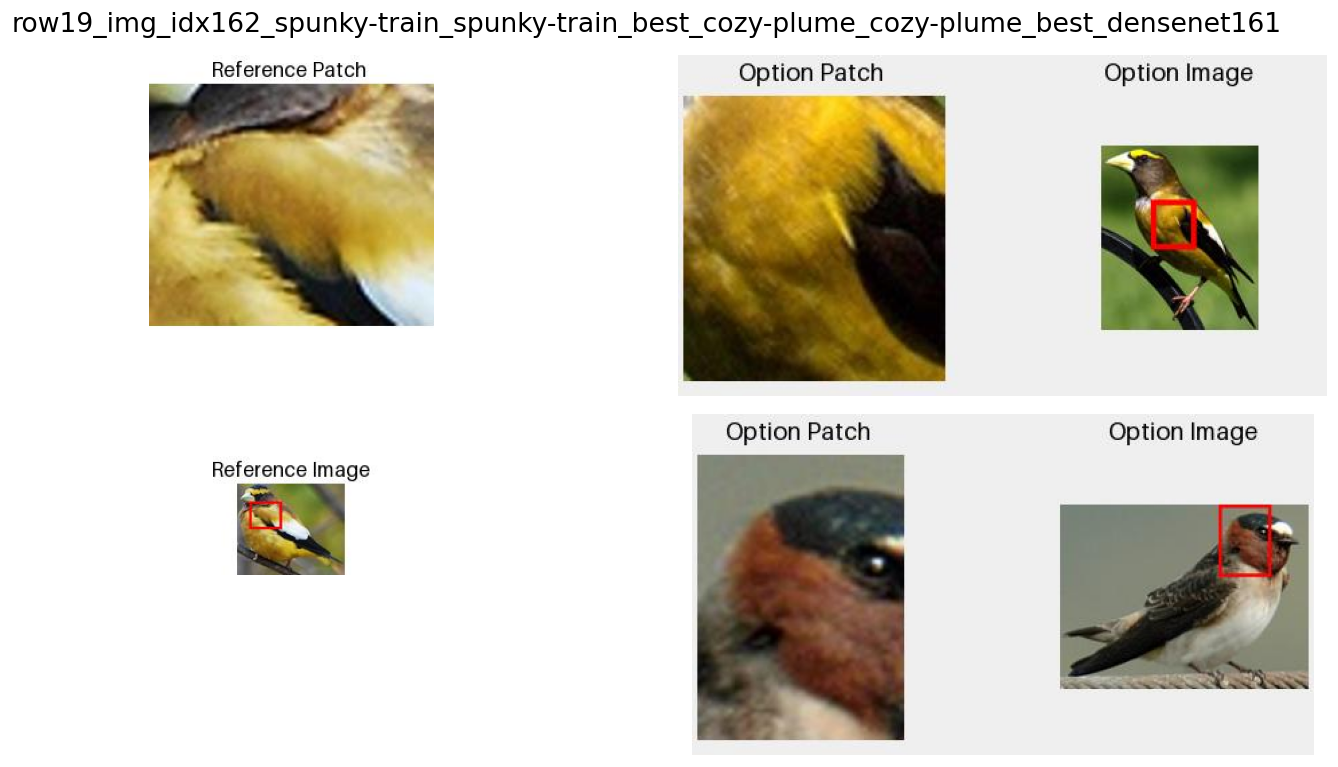

In [182]:
show(25)

img_path train_cropped/137.Cliff_Swallow/Cliff_Swallow_0018_132974.jpg
row19_img_idx162_spunky-train_spunky-train_best_cozy-plume_cozy-plume_best_densenet161 (10, 10, 50, 130)


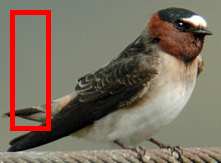

In [183]:
fake_bb(25, 'l2', (10, 10, 50, 130))

row6_img_idx17_witty-planet_witty-planet_best_true-season_true-season_best_densenet161


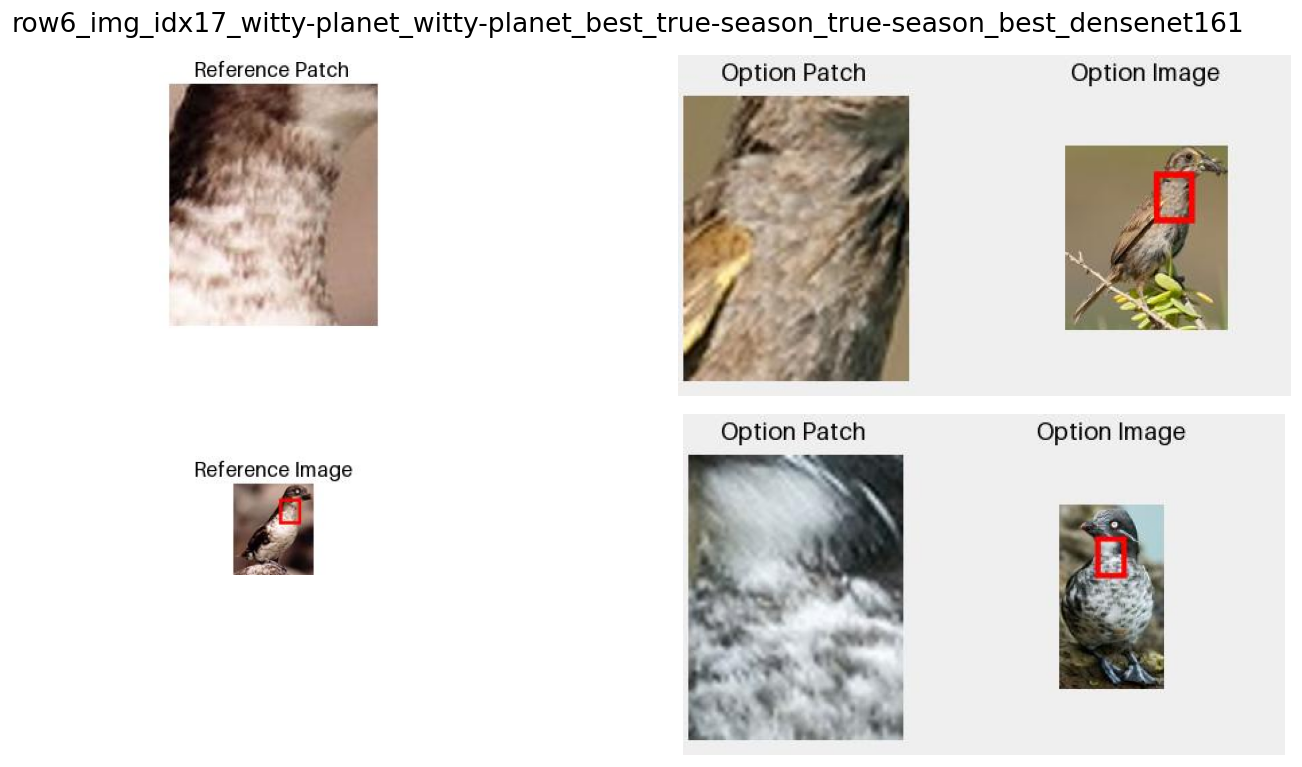

In [184]:
show(39)

img_path train_cropped/128.Seaside_Sparrow/Seaside_Sparrow_0002_796536.jpg
row6_img_idx17_witty-planet_witty-planet_best_true-season_true-season_best_densenet161 (120, 180, 170, 260)


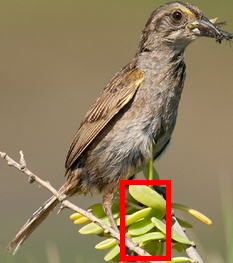

In [185]:
fake_bb(39, 'cos', (120, 180, 170, 260))

row6_img_idx129_witty-planet_witty-planet_best_true-season_true-season_best_densenet161


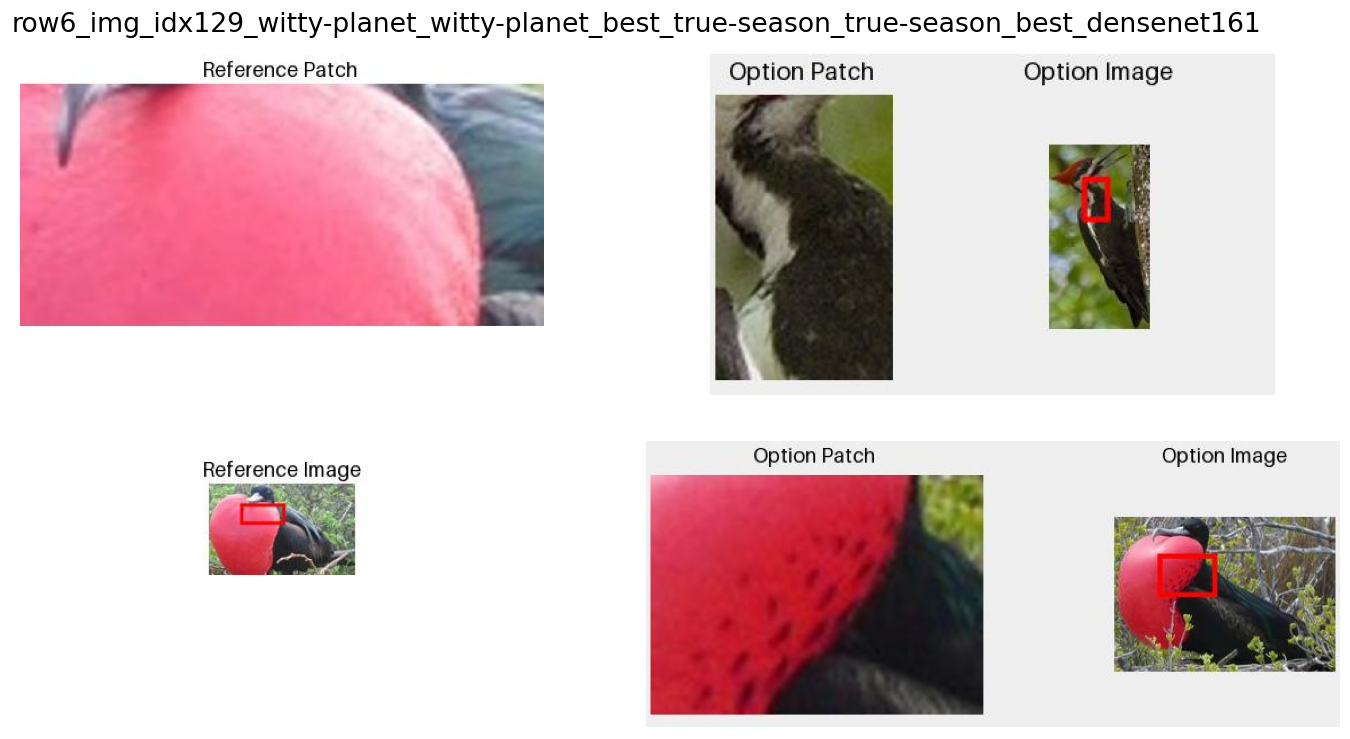

In [186]:
show(57)

img_path train_cropped/188.Pileated_Woodpecker/Pileated_Woodpecker_0072_180006.jpg
row6_img_idx129_witty-planet_witty-planet_best_true-season_true-season_best_densenet161 (60, 270, 160, 390)


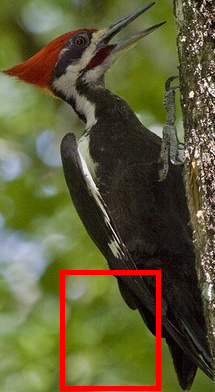

In [187]:
fake_bb(57, 'cos', (60, 270, 160, 390))

In [190]:
attention_rows_df = pd.DataFrame(attention_rows.items(), columns=['id', 'bb'])
attention_rows_df['distance'] = attention_rows_df['bb'].apply(lambda x: x[0])
attention_rows_df['bb'] = attention_rows_df['bb'].apply(lambda x: x[1])
attention_rows_df

id                    bb  \
0  row19_img_idx221_spunky-train_spunky-train_bes...      (0, 0, 100, 100)   
1  row37_img_idx46_feisty-house_feisty-house_best...   (20, 200, 120, 300)   
2  row8_img_idx154_quirky-spirit_quirky-spirit_be...    (150, 20, 250, 70)   
3  row19_img_idx162_spunky-train_spunky-train_bes...     (10, 10, 50, 130)   
4  row6_img_idx17_witty-planet_witty-planet_best_...  (120, 180, 170, 260)   
5  row6_img_idx129_witty-planet_witty-planet_best...   (60, 270, 160, 390)   

  distance  
0       l2  
1       l2  
2       l2  
3       l2  
4      cos  
5      cos

In [193]:
attention_rows_df.to_csv('user_study/attention-boxes.csv', index=False)

In [194]:
attention_samples_df = pd.read_csv('user_study/attention-samples.csv')
attention_samples_df

id  \
0   row37_img_idx95_feisty-house_feisty-house_best...   
1   row42_img_idx95_mellow-melon_mellow-melon_best...   
2   row38_img_idx95_happy-temple_happy-temple_best...   
3   row20_img_idx221_swift-vortex_swift-vortex_bes...   
4   row19_img_idx221_spunky-train_spunky-train_bes...   
..                                                ...   
95  row30_img_idx30_happy-temple_happy-temple_best...   
96  row17_img_idx171_thrifty-heart_thrifty-heart_b...   
97  row41_img_idx87_quirk-sculpture_quirk-sculptur...   
98  row9_img_idx64_rapid-lemon_rapid-lemon_best_sh...   
99  row53_img_idx92_wild-glove_wild-glove_best_stu...   

                             backbone  \
0   resnet50[pretraining=inaturalist]   
1   resnet50[pretraining=inaturalist]   
2   resnet50[pretraining=inaturalist]   
3                         densenet161   
4                         densenet161   
..                                ...   
95  resnet50[pretraining=inaturalist]   
96                        densenet161   
97  resnet50[pretraining=inaturalist]   
98                        densenet161   
99                              vgg19   

                                      reference_image      reference_patch  \
0   val_cropped/032.Mangrove_Cuckoo/Mangrove_Cucko...    [80, 0, 118, 123]   
1   val_cropped/032.Mangrove_Cuckoo/Mangrove_Cucko...    [78, 0, 118, 123]   
2   val_cropped/032.Mangrove_Cuckoo/Mangrove_Cucko...    [78, 0, 118, 129]   
3   val_cropped/074.Florida_Jay/Florida_Jay_0108_6...     [25, 37, 92, 77]   
4   val_cropped/074.Florida_Jay/Florida_Jay_0108_6...     [32, 41, 90, 80]   
..                                                ...                  ...   
95  val_cropped/011.Rusty_Blackbird/Rusty_Blackbir...   [109, 36, 178, 79]   
96  val_cropped/058.Pigeon_Guillemot/Pigeon_Guille...    [28, 23, 103, 63]   
97  val_cropped/030.Fish_Crow/Fish_Crow_0001_26031...    [57, 31, 139, 83]   
98  val_cropped/022.Chuck_will_Widow/Chuck_Will_Wi...  [100, 68, 193, 133]   
99  val_cropped/031.Black_billed_Cuckoo/Black_Bill...    [81, 29, 155, 75]   

                                     option_cos_image     option_cos_patch  \
0   train_cropped/032.Mangrove_Cuckoo/Mangrove_Cuc...  [270, 50, 407, 122]   
1   train_cropped/032.Mangrove_Cuckoo/Mangrove_Cuc...      [30, 0, 86, 81]   
2   train_cropped/032.Mangrove_Cuckoo/Mangrove_Cuc...   [181, 38, 268, 67]   
3   train_cropped/074.Florida_Jay/Florida_Jay_0002...   [213, 40, 315, 92]   
4   train_cropped/074.Florida_Jay/Florida_Jay_0036...  [163, 81, 242, 166]   
..                                                ...                  ...   
95  train_cropped/019.Gray_Catbird/Gray_Catbird_01...   [45, 57, 122, 126]   
96  train_cropped/058.Pigeon_Guillemot/Pigeon_Guil...   [77, 55, 141, 113]   
97  train_cropped/030.Fish_Crow/Fish_Crow_0022_260...   [94, 83, 178, 162]   
98  train_cropped/092.Nighthawk/Nighthawk_0063_795...   [43, 117, 75, 196]   
99  train_cropped/154.Red_eyed_Vireo/Red_Eyed_Vire...    [60, 0, 200, 194]   

                                      option_l2_image      option_l2_patch  \
0   train_cropped/005.Crested_Auklet/Crested_Aukle...    [70, 43, 94, 110]   
1   train_cropped/005.Crested_Auklet/Crested_Aukle...    [70, 43, 94, 110]   
2   train_cropped/005.Crested_Auklet/Crested_Aukle...    [70, 43, 94, 110]   
3   train_cropped/137.Cliff_Swallow/Cliff_Swallow_...  [149, 33, 264, 166]   
4   train_cropped/137.Cliff_Swallow/Cliff_Swallow_...  [149, 33, 264, 166]   
..                                                ...                  ...   
95  train_cropped/011.Rusty_Blackbird/Rusty_Blackb...     [98, 0, 135, 85]   
96   train_cropped/046.Gadwall/Gadwall_0031_30935.jpg   [207, 60, 306, 99]   
97  train_cropped/107.Common_Raven/Common_Raven_00...    [0, 92, 468, 292]   
98  train_cropped/022.Chuck_will_Widow/Chuck_Will_...   [90, 72, 191, 117]   
99  train_cropped/031.Black_billed_Cuckoo/Black_Bi...  [132, 35, 197, 127]   

    option_cos_act_vals  option_cos_act_percs  ...          mo

In [207]:
attention_df = attention_samples_df.loc[attention_samples_df['id'].isin(attention_rows_df['id'])].set_index('id')
attention_df

backbone  \
id                                                                                      
row19_img_idx221_spunky-train_spunky-train_best...                        densenet161   
row37_img_idx46_feisty-house_feisty-house_best_...  resnet50[pretraining=inaturalist]   
row8_img_idx154_quirky-spirit_quirky-spirit_bes...                        densenet161   
row19_img_idx162_spunky-train_spunky-train_best...                        densenet161   
row6_img_idx17_witty-planet_witty-planet_best_t...                        densenet161   
row6_img_idx129_witty-planet_witty-planet_best_...                        densenet161   

                                                                                      reference_image  \
id                                                                                                      
row19_img_idx221_spunky-train_spunky-train_best...  val_cropped/074.Florida_Jay/Florida_Jay_0108_6...   
row37_img_idx46_feisty-house_feisty-house_best_...  val_cropped/016.Painted_Bunting/Painted_Buntin...   
row8_img_idx154_quirky-spirit_quirky-spirit_bes...  val_cropped/052.Pied_billed_Grebe/Pied_Billed_...   
row19_img_idx162_spunky-train_spunky-train_best...  val_cropped/055.Evening_Grosbeak/Evening_Grosb...   
row6_img_idx17_witty-planet_witty-planet_best_t...  val_cropped/006.Least_Auklet/Least_Auklet_0063...   
row6_img_idx129_witty-planet_witty-planet_best_...  val_cropped/044.Frigatebird/Frigatebird_0070_4...   

                                                        reference_patch  \
id                                                                        
row19_img_idx221_spunky-train_spunky-train_best...     [32, 41, 90, 80]   
row37_img_idx46_feisty-house_feisty-house_best_...  [184, 67, 287, 152]   
row8_img_idx154_quirky-spirit_quirky-spirit_bes...    [67, 52, 144, 92]   
row19_img_idx162_spunky-train_spunky-train_best...   [27, 40, 101, 103]   
row6_img_idx17_witty-planet_witty-planet_best_t...  [222, 72, 328, 195]   
row6_img_idx129_witty-planet_witty-planet_best_...   [84, 53, 205, 109]   

                                                                                     option_cos_image  \
id                                                                                                      
row19_img_idx221_spunky-train_spunky-train_best...  train_cropped/074.Florida_Jay/Florida_Jay_0036...   
row37_img_idx46_feisty-house_feisty-house_best_...  train_cropped/016.Painted_Bunting/Painted_Bunt...   
row8_img_idx154_quirky-spirit_quirky-spirit_bes...  train_cropped/052.Pied_billed_Grebe/Pied_Bille...   
row19_img_idx162_spunky-train_spunky-train_best...  train_cropped/055.Evening_Grosbeak/Evening_Gro...   
row6_img_idx17_witty-planet_witty-planet_best_t...  train_cropped/128.Seaside_Sparrow/Seaside_Spar...   
row6_img_idx129_witty-planet_witty-planet_best_...  train_cropped/188.Pileated_Woodpecker/Pileated...   

                                                       option_cos_patch  \
id                                                                        
row19_img_idx221_spunky-train_spunky-train_best...  [163, 81, 242, 166]   
row37_img_idx46_feisty-house_feisty-house_best_...    [52, 44, 116, 85]   
row8_img_idx154_quirky-spirit_quirky-spirit_bes...  [135, 63, 210, 109]   
row19_img_idx162_spunky-train_spunky-train_best...   [80, 87, 153, 166]   
row6_img_idx17_witty-planet_witty-planet_best_t...  [127, 37, 185, 110]   
row6_img_idx129_witty-planet_witty-planet_best_...   [70, 68, 130, 164]   

                                                                                      option_l2_image  \
id                                                                                                      
row19_img_idx221_spunky-train_spunky-train_best...  train_cropped/137.Cliff_Swallow/Cliff_Swallow_...   
row37_img_idx46_feisty-house_feisty-house_best_...  train_cropped/011.Rusty_Blackbird/Rusty_Blackb...   
row8_img_idx154_quirky-spirit_quirky-spirit_bes...  train_cr

In [221]:
import numpy as np
for row in attention_rows_df.itertuples():
    attention_df.at[row.id, f'option_{row.distance}_patch'] = tuple(row.bb)

attention_df

backbone  \
id                                                                                      
row19_img_idx221_spunky-train_spunky-train_best...                        densenet161   
row37_img_idx46_feisty-house_feisty-house_best_...  resnet50[pretraining=inaturalist]   
row8_img_idx154_quirky-spirit_quirky-spirit_bes...                        densenet161   
row19_img_idx162_spunky-train_spunky-train_best...                        densenet161   
row6_img_idx17_witty-planet_witty-planet_best_t...                        densenet161   
row6_img_idx129_witty-planet_witty-planet_best_...                        densenet161   

                                                                                      reference_image  \
id                                                                                                      
row19_img_idx221_spunky-train_spunky-train_best...  val_cropped/074.Florida_Jay/Florida_Jay_0108_6...   
row37_img_idx46_feisty-house_feisty-house_best_...  val_cropped/016.Painted_Bunting/Painted_Buntin...   
row8_img_idx154_quirky-spirit_quirky-spirit_bes...  val_cropped/052.Pied_billed_Grebe/Pied_Billed_...   
row19_img_idx162_spunky-train_spunky-train_best...  val_cropped/055.Evening_Grosbeak/Evening_Grosb...   
row6_img_idx17_witty-planet_witty-planet_best_t...  val_cropped/006.Least_Auklet/Least_Auklet_0063...   
row6_img_idx129_witty-planet_witty-planet_best_...  val_cropped/044.Frigatebird/Frigatebird_0070_4...   

                                                        reference_patch  \
id                                                                        
row19_img_idx221_spunky-train_spunky-train_best...     [32, 41, 90, 80]   
row37_img_idx46_feisty-house_feisty-house_best_...  [184, 67, 287, 152]   
row8_img_idx154_quirky-spirit_quirky-spirit_bes...    [67, 52, 144, 92]   
row19_img_idx162_spunky-train_spunky-train_best...   [27, 40, 101, 103]   
row6_img_idx17_witty-planet_witty-planet_best_t...  [222, 72, 328, 195]   
row6_img_idx129_witty-planet_witty-planet_best_...   [84, 53, 205, 109]   

                                                                                     option_cos_image  \
id                                                                                                      
row19_img_idx221_spunky-train_spunky-train_best...  train_cropped/074.Florida_Jay/Florida_Jay_0036...   
row37_img_idx46_feisty-house_feisty-house_best_...  train_cropped/016.Painted_Bunting/Painted_Bunt...   
row8_img_idx154_quirky-spirit_quirky-spirit_bes...  train_cropped/052.Pied_billed_Grebe/Pied_Bille...   
row19_img_idx162_spunky-train_spunky-train_best...  train_cropped/055.Evening_Grosbeak/Evening_Gro...   
row6_img_idx17_witty-planet_witty-planet_best_t...  train_cropped/128.Seaside_Sparrow/Seaside_Spar...   
row6_img_idx129_witty-planet_witty-planet_best_...  train_cropped/188.Pileated_Woodpecker/Pileated...   

                                                        option_cos_patch  \
id                                                                         
row19_img_idx221_spunky-train_spunky-train_best...   [163, 81, 242, 166]   
row37_img_idx46_feisty-house_feisty-house_best_...     [52, 44, 116, 85]   
row8_img_idx154_quirky-spirit_quirky-spirit_bes...   [135, 63, 210, 109]   
row19_img_idx162_spunky-train_spunky-train_best...    [80, 87, 153, 166]   
row6_img_idx17_witty-planet_witty-planet_best_t...  (120, 180, 170, 260)   
row6_img_idx129_witty-planet_witty-planet_best_...   (60, 270, 160, 390)   

                                                                                      option_l2_image  \
id                                                                                                      
row19_img_idx221_spunky-train_spunky-train_best...  train_cropped/137.Cliff_Swallow/Cliff_Swallow_...   
row37_img_idx46_feisty-house_feisty-house_best_...  train_cropped/011.Rusty_Blackbird/Rusty_Blackb...   
row8_img_idx154_quirky-spirit_quirky-spirit_bes...  

In [ ]:
attention_df.to_csv('user_study/attention-samples-selected.csv')